# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [2]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [4]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


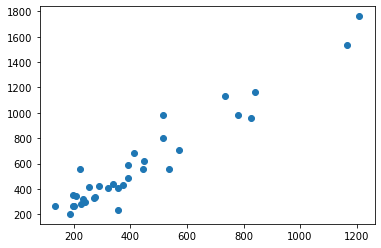

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['daily'], data['sunday'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

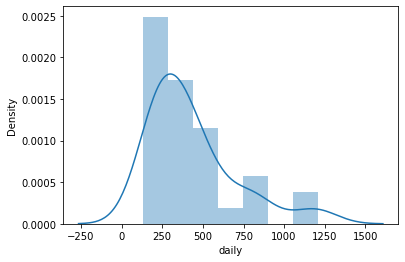

In [6]:
import seaborn as sns
sns.distplot(data['daily'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

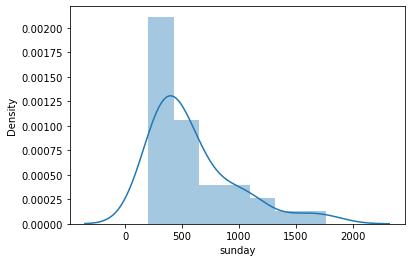

In [7]:
sns.distplot(data['sunday'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

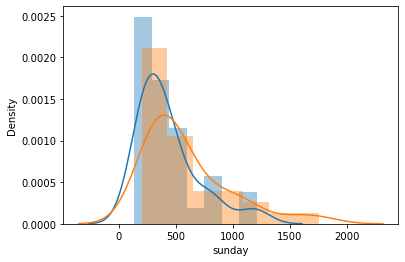

In [8]:
sns.distplot(data['daily'])
sns.distplot(data['sunday'])

### Fitting a Linear Regression Model

<AxesSubplot:xlabel='daily', ylabel='sunday'>

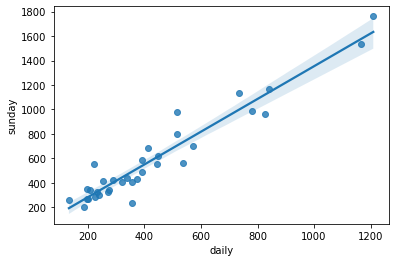

In [9]:
sns.regplot(x="daily", y="sunday", data=data)

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily", data = data).fit()

In [11]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [12]:
#t and p-Values
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

In [13]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [14]:
#R squared values
model.rsquared

0.9180596895873295

In [15]:
model.rsquared_adj

0.9154990548869336

# Predict for new data point

In [21]:
#Predict for 200 and 300 daily circulation
newdata = pd.Series([200,300])

In [17]:
data_pred = pd.DataFrame(newdata, columns=['daily'])
data_pred

,daily
0,200
1,300


In [18]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [19]:
#Y = 13.835630 + 1.339715 * X

In [20]:
13.835630 + 1.339715 * 200, 13.835630 + 1.339715 * 300

(281.77862999999996, 415.75012999999996)